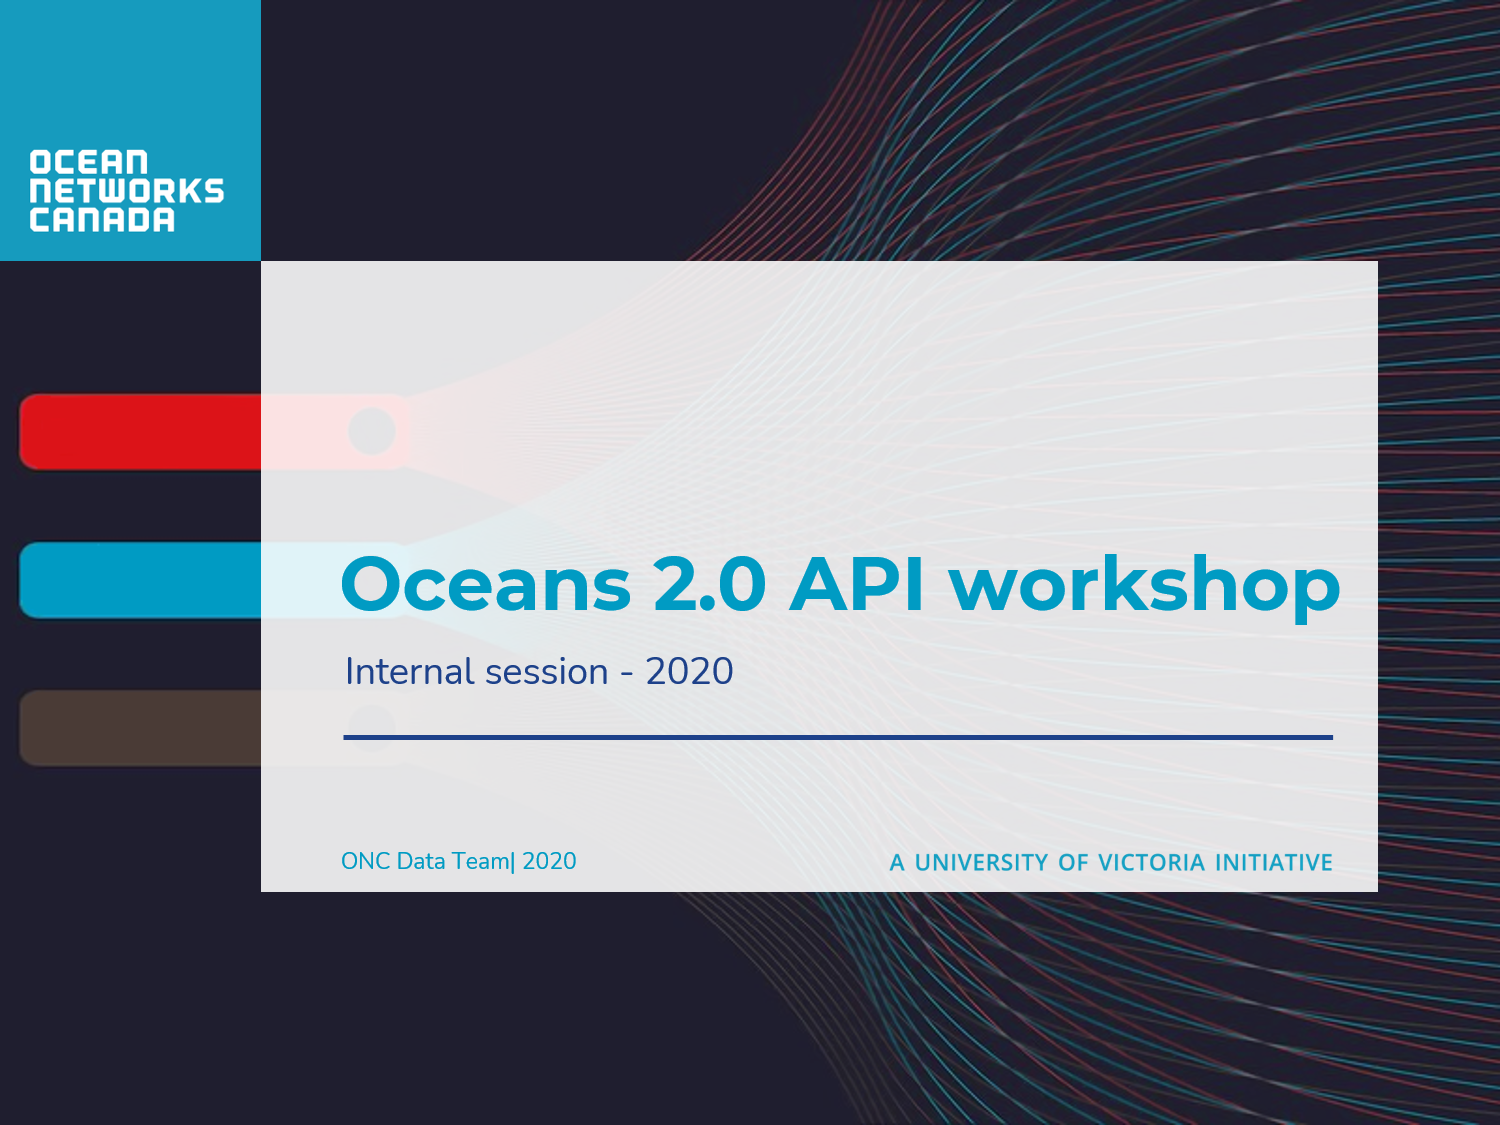

# Introdution to ONC Webservices/API

## What does API mean? 
API stands for Application Programming Interface. 
APIs allow two applications to interface (or interact) with each other. [source](https://www.freecodecamp.org/news/what-does-api-stand-for-a-definition-of-the-coding-acronym-in-plain-english/)

## What is it?
A group of public web services that can be used to explore and download ONC data, using any programming language.


## Before we begin:
1. For your reference, open the [client libray documentation](https://wiki.oceannetworks.ca/display/O2A/Client+Libraries) on a new tab
2. Follow this guide/tutorial
 - You are expected to read the text and run the code cells .
 -  You can run code cells by selecting them and pressing the **Run** button or with the shortcut **Ctrl+ENTER**.
2. Remember to replace your token in every code block where it says **MY_TOKEN**
3. **Run the following cell** once to install the Python onc client:

## The ONC webservices 

Wiki page: https://wiki.oceannetworks.ca/display/O2A/Oceans+2.0+API+Home

<div>
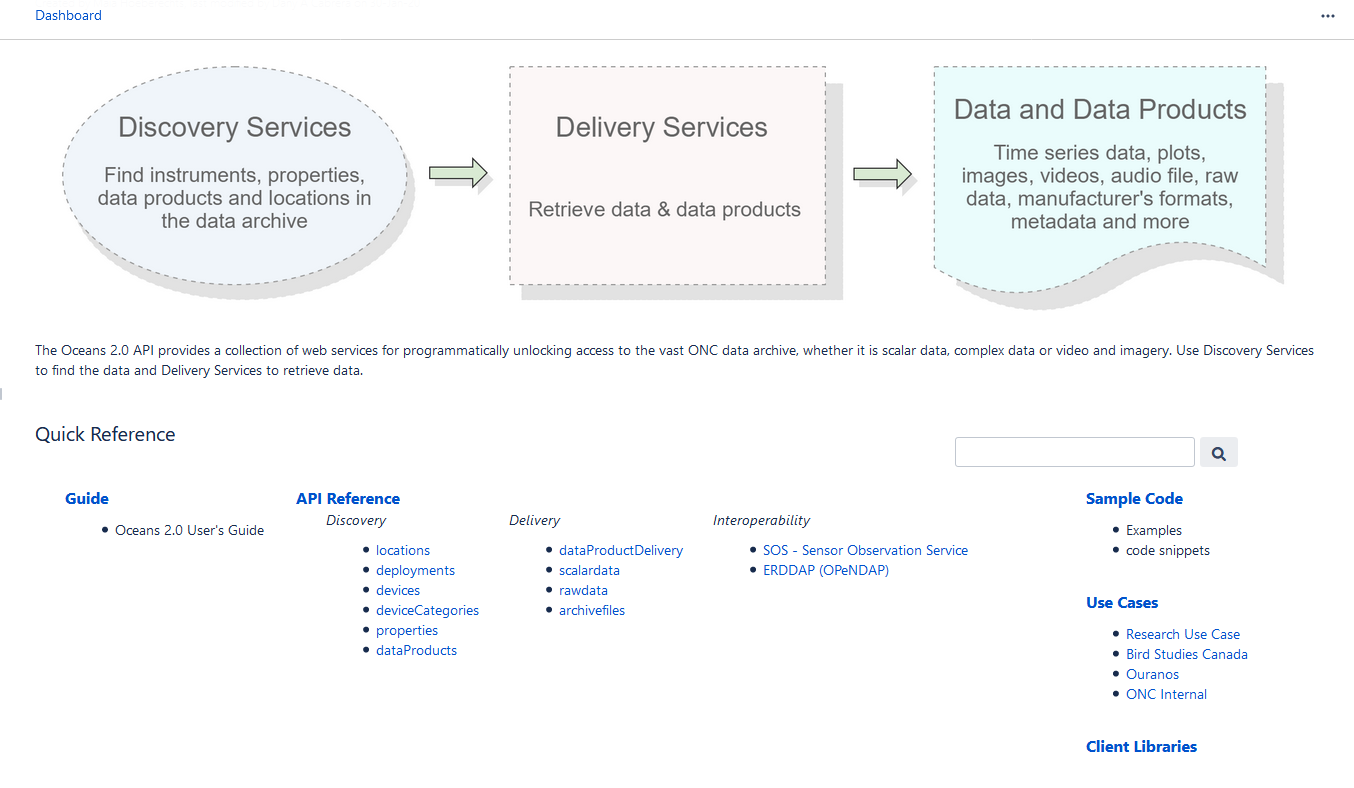
</div>



<div>
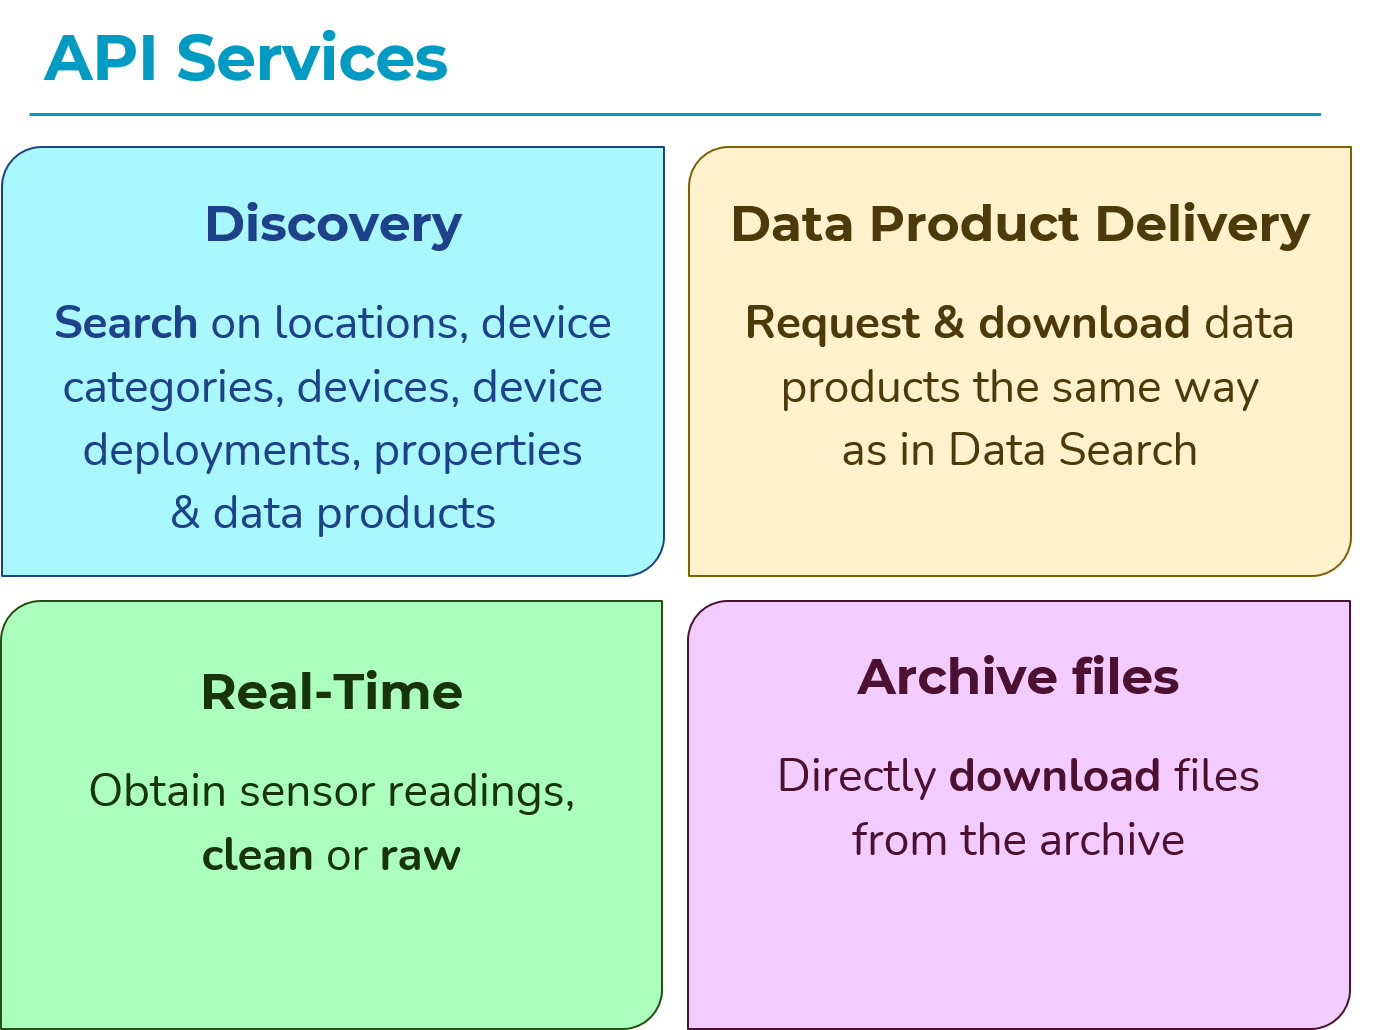
</div>

### How to run webservices through an URL 

In [8]:
### get your Token 

from get_ONC_token import get_ONC_token
token = get_ONC_token()
print(token)

20e46e94-e914-48b4-add6-fe8abe12b88d 


### <font color= blue> Deployment services </font>

#### Deployments of all Bottom-Pressure-Recorder (BPR) at Clayoquot Slope site NC89 

https://data.oceannetworks.ca/api/deployments?method=get&deviceCategoryCode=BPR&locationCode=NC89&token=***


<div>
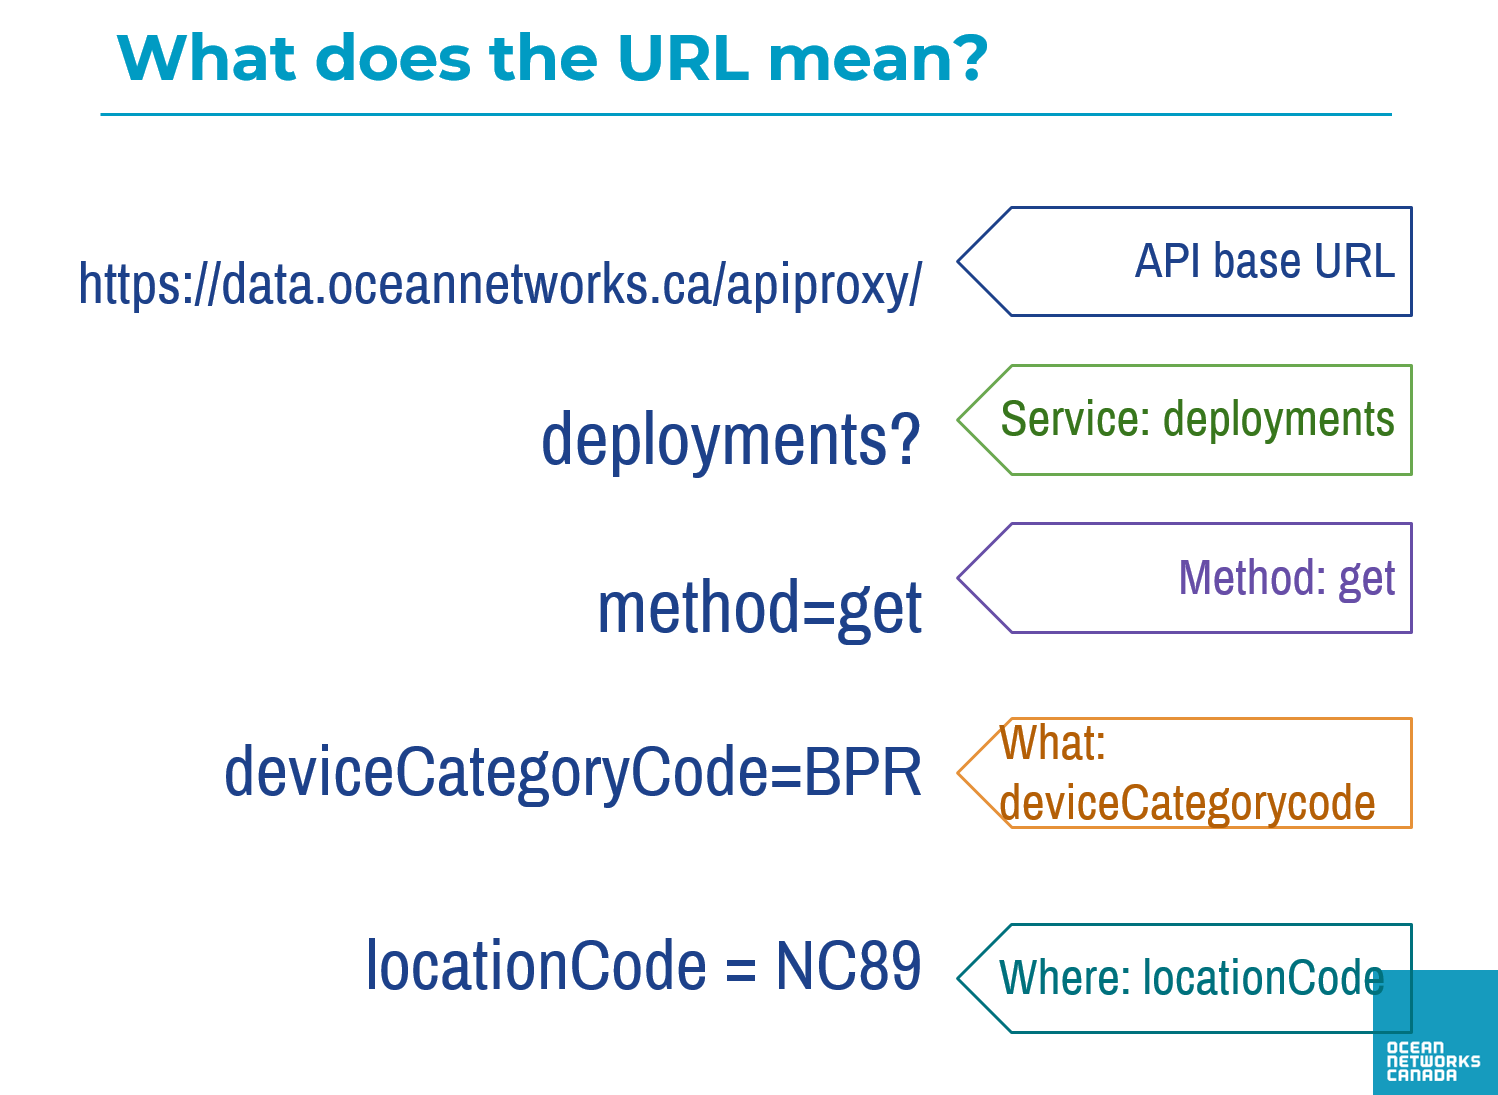
</div>


#### You probably get something like this: 
[{"begin":"2009-09-06T15:05:58.000Z","depth":1258.0,"deviceCategoryCode":"BPR","deviceCode":"BPR_889","end":null,"hasDeviceData":true,"heading":null,"lat":48.670835,"locationCode":"NC89","lon":-126.847965,"pitch":null,"roll":null}]

#### But with a JSON converter in your browser it looks like this (more readable): 
<div>
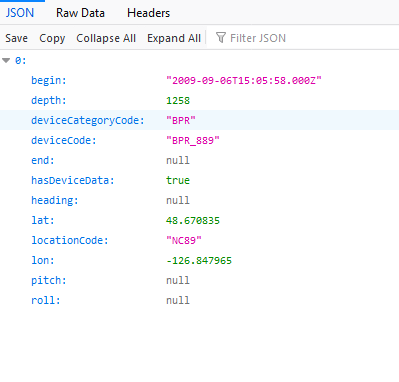
</div>

### <font color=blue> Location Services </font>

#### All locations in Oceans2.0 that have a BPR installed

https://data.oceannetworks.ca/apiproxy/locations?method=get&deviceCategoryCode=BPR

<div>
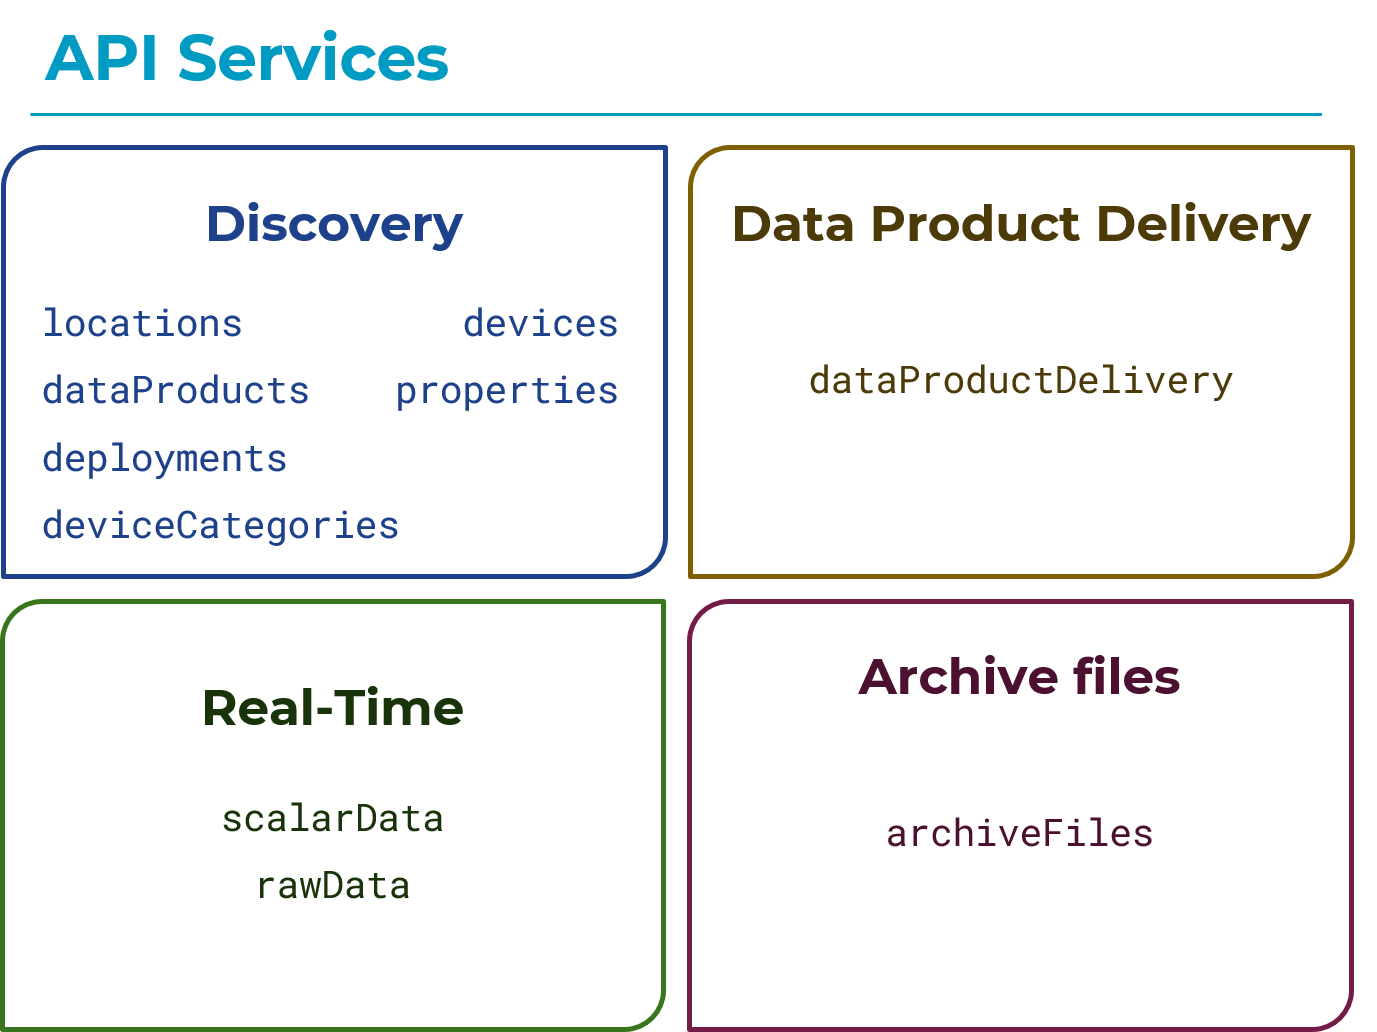
</div>

<div>
    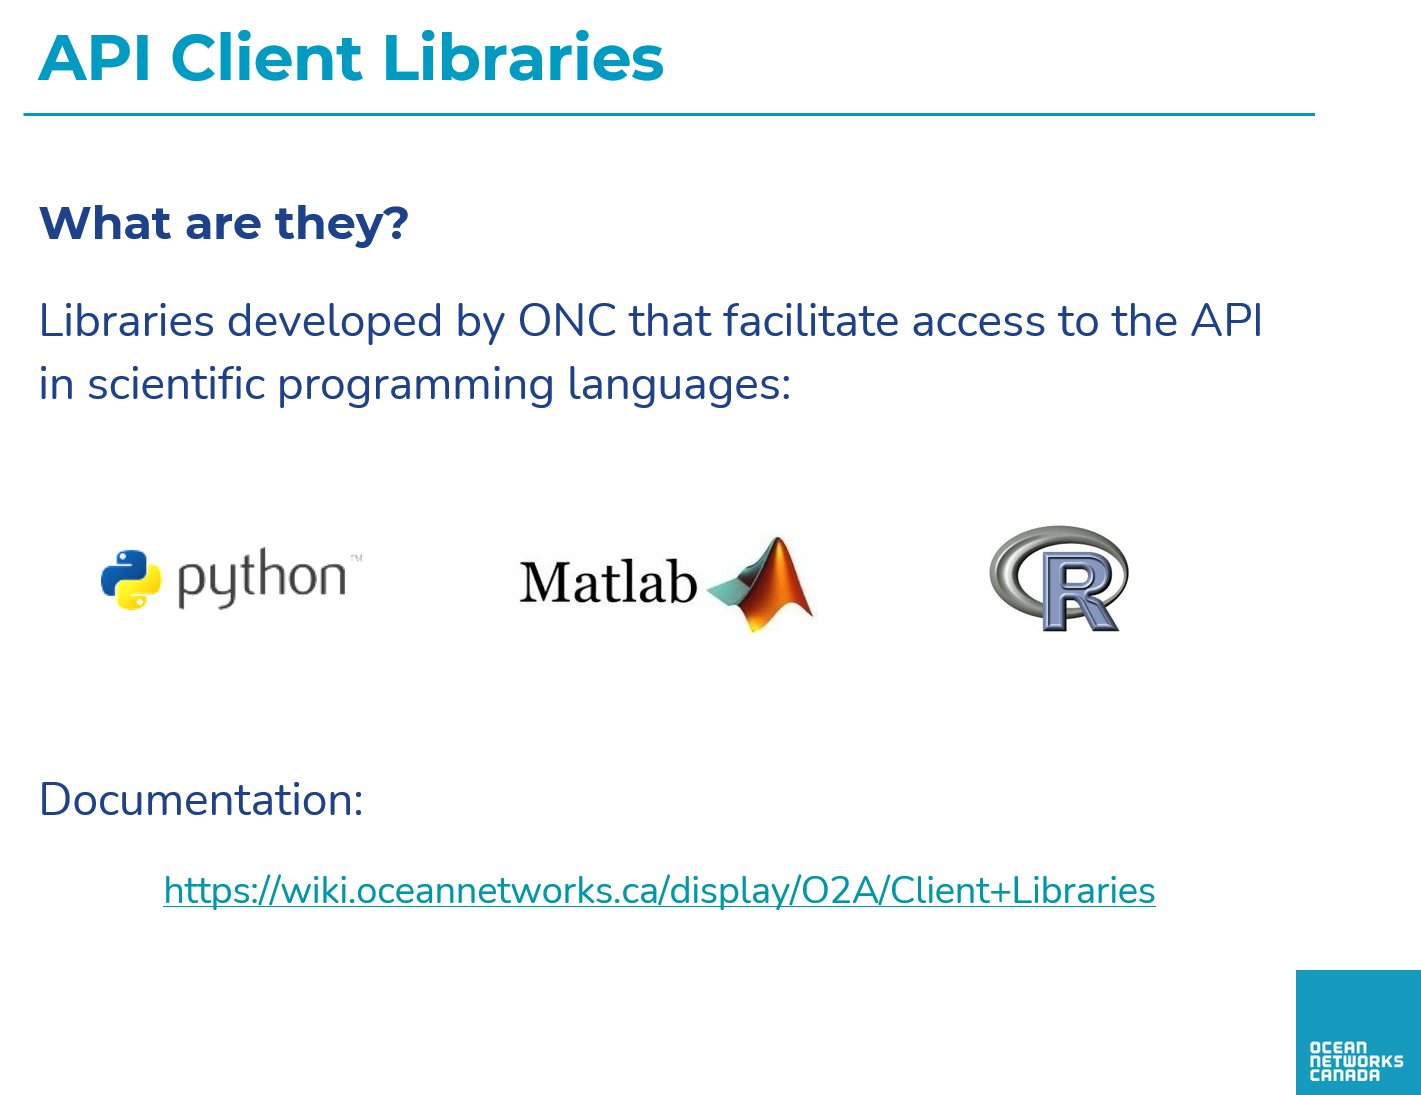
    </div>

## <font color= green> Using the Python client libraries </font>

###  First you need to install some client libraries

In [12]:
# Install the "onc" pip package in the current Jupyter kernel (pip install onc)
import sys
!{sys.executable} -m pip install onc --upgrade

Requirement already up-to-date: onc in c:\users\schlesin\.conda\envs\jpnote\lib\site-packages (2.3.5)


## The Onc Class

Create an object from the ONC class to access the client library's functionality (requires your token).

We create one in the following cell, and reuse it throughout the tutorial:

In [9]:
from onc.onc import ONC
onc = ONC(token) # remember you saved your token in above cell

## 1. Searching with discovery methods

To download ONC data, you need to specify the type of data you require and where in particular (i.e. location, device) it originates from.

In the Oceans 2.0 API, there's a unique code that identifies every location, device, property, data product type, etc. You include these codes in a group of filters that determine the data you're interested in.

Discovery methods allow you to explore the hierarchy of the ONC database to obtain the codes for your filters (they work like a "search" function).

The example below uses the getLocations method to search for locations that include _"Bullseye"_ in their name (i.e. _"Clayoquot Slope Bullseye Vent"_):

The code prints a list with a location that matches the search filters provided; this location includes a "locationCode".

In [13]:
filters = {'locationName': 'Bullseye'}
result = onc.getLocations(filters)
 
onc.print(result)

[
    {
        "deployments": 31,
        "locationName": "Bullseye",
        "depth": 1256.96129,
        "bbox": {
            "maxDepth": 1260.0,
            "maxLat": 48.671024,
            "maxLon": -126.847007,
            "minDepth": 1253.0,
            "minLat": 48.669268,
            "minLon": -126.85184
        },
        "description": " Bullseye is a location at Clayoquot Slope, where gas hydrates, seafloor cold seeps, and hydrate dynamics are observed.",
        "hasDeviceData": true,
        "lon": -126.848023,
        "locationCode": "NC89",
        "hasPropertyData": false,
        "lat": 48.670599,
        "dataSearchURL": "http://data.oceannetworks.ca/DataSearch?location=NC89"
    }
]


 *Use the onc.print() method to print any result returned by the client library in a format easier to read.*

## What <FONT COLOR=GREEN> device categories </font> are available here at NC89?

In [14]:
result = onc.getDeviceCategories({'locationCode': 'NC89'})
onc.print(result)

[
    {
        "cvTerm": {
            "deviceCategory": [
                {
                    "uri": "http://vocab.nerc.ac.uk/collection/L05/current/115/",
                    "vocabulary": "SeaDataNet device categories"
                }
            ]
        },
        "description": "Acoustic Doppler Current Profiler 55 kHz ",
        "deviceCategoryCode": "ADCP55KHZ",
        "deviceCategoryName": "Acoustic Doppler Current Profiler 55 kHz",
        "hasDeviceData": true,
        "longDescription": " Acoustic Doppler Current Profilers are hydroacoustic instruments, similar to sonars. ADCPs measure current speed and direction at multiple predetermined depths simultaneously. ADCPs use the Doppler effect of sound waves that are scattered by particles in seawater over a depth range."
    },
    {
        "cvTerm": {
            "deviceCategory": [
                {
                    "uri": "http://vocab.nerc.ac.uk/collection/L05/current/115/",
                    "vocabulary": "Se

## What properties are available for the <font color=green> CTD category </font>  at this location (NC89)?

In [15]:
result = onc.getProperties({'locationCode': 'NC89', 'deviceCategoryCode': 'CTD'})
onc.print(result)

[
    {
        "cvTerm": {
            "property": [],
            "uom": [
                {
                    "uri": "http://vocab.nerc.ac.uk/collection/P06/current/UECA/",
                    "vocabulary": "BODC data storage units"
                }
            ]
        },
        "description": "Conductivity: siemens per metre",
        "hasDeviceData": true,
        "hasPropertyData": true,
        "propertyCode": "conductivity",
        "propertyName": "Conductivity",
        "uom": "S/m"
    },
    {
        "cvTerm": {
            "property": [],
            "uom": [
                {
                    "uri": "http://vocab.nerc.ac.uk/collection/P06/current/UKMC/",
                    "vocabulary": "BODC data storage units"
                }
            ]
        },
        "description": "Density",
        "hasDeviceData": true,
        "hasPropertyData": true,
        "propertyCode": "density",
        "propertyName": "Density",
        "uom": "kg/m3"
    },
    {
      

## What <font color=green> data product types </font> are available for the CTD category at this location?

In [16]:
result = onc.getDataProducts({'locationCode': 'NC89', 'deviceCategoryCode': 'CTD'})
onc.print(result)

[
    {
        "dataProductCode": "LF",
        "dataProductName": "Log File",
        "extension": "txt",
        "hasDeviceData": true,
        "hasPropertyData": false,
        "helpDocument": "https://wiki.oceannetworks.ca/display/DP/4"
    },
    {
        "dataProductCode": "MSQAQCR",
        "dataProductName": "Manual Scalar QAQC Results",
        "extension": "qaqc",
        "hasDeviceData": true,
        "hasPropertyData": false,
        "helpDocument": "https://wiki.oceannetworks.ca/display/DP/106"
    },
    {
        "dataProductCode": "SBCTDRF",
        "dataProductName": "Sea-Bird CTD Raw Files",
        "extension": "hex",
        "hasDeviceData": true,
        "hasPropertyData": false,
        "helpDocument": "https://wiki.oceannetworks.ca/display/DP/78"
    },
    {
        "dataProductCode": "TSSD",
        "dataProductName": "Time Series Scalar Data",
        "extension": "json",
        "hasDeviceData": true,
        "hasPropertyData": false,
        "helpDocument"

## 2. Obtaining sensor readings in (near) real-time

Once you determine the exact filters that identify the data you are interested in, there are 3 different methods available to download it.

One method allows you to <font color=green> **directly download time-series** </font> of sensor readings for a given timeframe.

In the following example, we obtain 5 seconds of conductivity readings from the CTD:

In [18]:
filters = {
  'locationCode': 'NC89',
  'deviceCategoryCode': 'CTD',
  'propertyCode': 'conductivity',
  'dateFrom': '2020-06-20T00:00:00.000Z',
  'dateTo': '2020-06-20T00:00:05.000Z'
}
result = onc.getDirectByLocation(filters)


In [19]:
onc.print(result)

{
    "messages": [],
    "next": null,
    "parameters": {
        "dateFrom": "2020-06-20T00:00:00.000Z",
        "dateTo": "2020-06-20T00:00:05.000Z",
        "deviceCategoryCode": "CTD",
        "fillGaps": true,
        "getLatest": false,
        "locationCode": "NC89",
        "metaData": "Minimum",
        "method": "getByLocation",
        "outputFormat": "Array",
        "propertyCode": [
            "conductivity"
        ],
        "qualityControl": "clean",
        "resamplePeriod": null,
        "resampleType": null,
        "rowLimit": 100000,
        "sensorCategoryCodes": null,
        "token": "20e46e94-e914-48b4-add6-fe8abe12b88d"
    },
    "queryUrl": "https://data.oceannetworks.ca/api/scalardata?locationCode=NC89&deviceCategoryCode=CTD&propertyCode=conductivity&dateFrom=2020-06-20T00%3A00%3A00.000Z&dateTo=2020-06-20T00%3A00%3A05.000Z&method=getByLocation&token=20e46e94-e914-48b4-add6-fe8abe12b88d",
    "sensorData": [
        {
            "actualSamples": 5,
    

The result includes matching lists of "values" and "sampleTimes". We also use the **property code** "conductivity" to limit results to a specific property available in this CTD (where did we get this property from?).

Note that we can also get the <FONT COLOR=GREEN> **raw readings directly** </FONT>from the device, using the method
 **getDirectRawByLocation()** 


In [20]:
filters = {
  'locationCode': 'NC89',
  'deviceCategoryCode': 'CTD',
  'dateFrom': '2020-06-20T00:00:00.000Z',
  'dateTo': '2020-06-20T00:00:05.000Z'
}
result = onc.getDirectRawByLocation(filters)
onc.print(result)

{
    "data": {
        "lineTypes": [
            " ",
            " ",
            " ",
            " ",
            " "
        ],
        "readings": [
            "<?xml version=\"1.0\"?><datapacket><hdr><mfg>Sea-Bird</mfg><model>19plus</model><sn>01907035</sn></hdr><data><t1>  2.8523</t1><c1> 3.16666</c1><p1>1269.229</p1><ser1><type>sbe63</type><oxph>38.099</oxph><oxtv>1.089869</oxtv></ser1><sal> 34.4819</sal><sv>1482.011</sv></data></datapacket>",
            "<?xml version=\"1.0\"?><datapacket><hdr><mfg>Sea-Bird</mfg><model>19plus</model><sn>01907035</sn></hdr><data><t1>  2.8523</t1><c1> 3.16666</c1><p1>1269.223</p1><ser1><type>sbe63</type><oxph>38.096</oxph><oxtv>1.089873</oxtv></ser1><sal> 34.4821</sal><sv>1482.011</sv></data></datapacket>",
            "<?xml version=\"1.0\"?><datapacket><hdr><mfg>Sea-Bird</mfg><model>19plus</model><sn>01907035</sn></hdr><data><t1>  2.8523</t1><c1> 3.16667</c1><p1>1269.217</p1><ser1><type>sbe63</type><oxph>38.096</oxph><oxtv>1.089870</oxtv><

## 3. Downloading data products

Another method is to request the ONC servers to generate a <FONT COLOR=GREEN> **data product** </FONT> the same way as in our **Oceans 2.0 Data Search**; This is done through the data product download methods.

The following example downloads two PNG files with plots for 30 seconds of data from a CTD (find them in the **"output"** folder of your jupyter main page):

In [24]:
filters = {
  'locationCode': 'NC89',
  'deviceCategoryCode': 'CTD',
  'dataProductCode': 'TSSP',
  'extension': 'png',
  'dateFrom': '2020-06-20T00:00:00.000Z',
  'dateTo': '2020-06-20T00:30:00.000Z',
  'dpo_qualityControl': '1',
  'dpo_resample': 'none'
}
result = onc.orderDataProduct(filters, includeMetadataFile=False)
 
onc.print(result)

Request Id: 6081388
Estimated File Size: 209 kB
Estimated Processing Time: 20 s


   Running.....
   Running... setting up search parameters.
   Running... getting data for time segment 1 of 1.....
   Running... writing data products, time range 1 of 1...........
   Transferring (ClayoquotSlope_Bullseye_ConductivityTemperatureDepth_20200620T000000Z_20200620T003000Z-clean.png) to the FTP server......................
Total run time: 3 seconds
Total download Time: 0.427 seconds
2 files (248.4 kB) downloaded
{
    "downloadResults": [
        {
            "url": "https://data.oceannetworks.ca/api/dataProductDelivery?method=download&token=20e46e94-e914-48b4-add6-fe8abe12b88d&dpRunId=16121853&index=1",
            "status": "complete",
            "size": 125370,
            "file": "ClayoquotSlope_Bullseye_ConductivityTemperatureDepth_20200620T000000Z_20200620T003000Z-clean.png",
            "index": "1",
            "downloaded": true,
            "requestCount": 47,
            "fileDown

The filters above include codes for **location**, **deviceCategory** and **dataProduct**, as well as the file **extension** and a time interval. They also include a couple of filters to configure this specific data product type (starting with the **"dpo_"** prefix) which can be obtained from the [Data Product Options documentation](https://wiki.oceannetworks.ca/display/O2A/Available+Data+Products). You can download more than 120 different types of data products including audio & video.

## 4. Downloading archived files

A faster way to download data products (if it suits your need) is to leverage how ONC scripts auto-generate and archive data products of different types at set time intervals. You can directly download these data product files from our files archive, as long as you know their unique filename.

In the following example, we get the list of archived files available for a camera at Ridley Island (in a certain time range):

In [32]:
# get the list of files
filters = {
    'locationCode': 'RISS',
    'deviceCategoryCode': 'VIDEOCAM',
    'dateFrom': '2016-12-01T00:00:00.000Z',
    'dateTo'  : '2016-12-01T00:05:00.000Z'
}
result = onc.getListByLocation(filters, allPages=True)
onc.print(result)

Once we have the file name, you can use the method **"getFile()"** to download individual files:

In [ ]:
# download one of the files
onc.getFile('AXISQ6044PTZACCC8E334C53_201601.000Z.jpg')

You can also use the method **"getDirectFiles()"** to download all the files that match your filters.

## 5. Closing comments

There are many other methods in the client libraries that can help you grab the data you want. Take a quick look at our [Client Libraries Documentation](https://wiki.oceannetworks.ca/display/O2A/Client+Libraries) to see what's possible, or ask ONC's Data Services Specialist (from the Data Team) if you have other questions.

Remember to check our [code examples](https://wiki.oceannetworks.ca/display/O2A/Code+examples) for common use-cases in different programming languages, including "how to download many TB of hydrphone files".

Happy scripting!